# Tugas Besar IF2220 - Probabilitas dan Statistika
### <font color='#3776ab'>Part 3: Normality Test</font>
Anggota: <br>
13521116 - Juan Christopher Santoso <br>
13521162 - Antonio Natthan Krishna <br>

### Data Preparation and Data Description

In [1]:
df <- read.csv("..\\test\\anggur.csv")

# get rows and columns of data
row <- nrow(df)
col <- ncol(df)

# enumeration of columns and rows
enums_col <- c(1:col)
enums_row <- c(1:row)

# Data Statistics
properties <- c("Rows", "Columns")
value <- c(nrow(df), ncol(df))
cbind(properties, value)

# List of Columns
columns_index <- c(1:ncol(df))
columns_name <- colnames(df)

# Display List
cbind(columns_index, columns_name)




properties,value
Rows,1000
Columns,12


columns_index,columns_name
1,fixed.acidity
2,volatile.acidity
3,citric.acid
4,residual.sugar
5,chlorides
6,free.sulfur.dioxide
7,total.sulfur.dioxide
8,density
9,pH
10,sulphates


### **Global Function used for Data Visualization**

In [2]:
getHist <- function(v, name, color) {
    hist(v,
    main = paste("Histogram of", name),
    xlab = paste("Value of", name),
    ylab = "Frequency",
    col = color)
}
getQQPlot <- function(v, name, color){
    qqnorm(v, 
    main = paste("Histogram of", name)
    )
    qqline(v,
    col = color)
}

### *Global Functions used for Normality Test*

In [3]:
# loading library package
library("dplyr")

# Mean data
cat("Column's Mean:\n")
columns_mean <- colMeans(df)
cbind(columns_mean)

cat("Column's Median: \n")

columns_median = c(1:ncol(df))
for (i in columns_index){
    columns_median[i] <- median(df[,columns_name[i]])
}
cbind(columns_name, columns_median)

getmode <- function(v) {
    uniquev <- unique(v)
    maxCount <- 0
    maxElmt <- 0
    for (j in c(1:nrow(df))){
        temp <- v[i]
        count <- 0
        for (k in c(i:nrow(df))){
            if (temp == v[k]){
                count <- count + 1
            }
        }
        if (count > maxCount){
            maxCount <- count
            maxElmt <- temp
        }
    }
    return(maxElmt)
}

cat("Column's Mode: \n")

columns_mode = c(1:ncol(df))
for (i in columns_index){
    columns_mode[i] <- getmode(df[,columns_name[i]])
}

cbind(columns_name, columns_mode)

cat("Column's Skewness: \n")

columns_skewness = c(1:ncol(df))

for (i in columns_index){
    tempMean <- mean(df[,columns_name[i]])
    tempStddev <- sd(df[,columns_name[i]])
    count <- 0
    for (j in c(1:nrow(df))){
        count <- count + (df[j, columns_name[i]] - tempMean) ^3
    }
    columns_skewness[i] <- count / (nrow(df) * (tempStddev ^3))
}

cbind(columns_name, columns_skewness)

cat("Column's Kurtosis: \n")

columns_kurtosis = c(1:ncol(df))

for (i in columns_index){
    tempMean <- mean(df[,columns_name[i]])
    tempSd <- sd(df[,columns_name[i]])
    numerator <- 0
    for (j in c(1:nrow(df))){
        numerator <- numerator + (df[j, columns_name[i]] - tempMean) ^ 4
    }
    
    columns_kurtosis[i] <- numerator / ( nrow(df) * tempSd ^ 4)
}

cbind(columns_name, columns_kurtosis)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'dgof'


The following object is masked from 'package:stats':

    ks.test




Column's Mean:


,columns_mean
fixed.acidity,7.15253000
volatile.acidity,0.52083850
citric.acid,0.27051700
residual.sugar,2.56710368
chlorides,0.08119515
free.sulfur.dioxide,14.90767925
total.sulfur.dioxide,40.29015000
density,0.99592530
pH,3.30361000
sulphates,0.59839000


Column's Median: 


columns_name,columns_median
fixed.acidity,7.15
volatile.acidity,0.52485
citric.acid,0.2722
residual.sugar,2.51943027286579
chlorides,0.0821669021645236
free.sulfur.dioxide,14.8603462365689
total.sulfur.dioxide,40.19
density,0.996
pH,3.3
sulphates,0.595


Column's Mode: 


columns_name,columns_mode
fixed.acidity,5.9
volatile.acidity,0.5768
citric.acid,0.3248
residual.sugar,3.37181458927355
chlorides,0.0663785866479429
free.sulfur.dioxide,12.2321700848591
total.sulfur.dioxide,44.26
density,0.9999
pH,3.27
sulphates,0.51


Column's Skewness: 


columns_name,columns_skewness
fixed.acidity,-0.0287919975632131
volatile.acidity,-0.197105997910775
citric.acid,-0.045439421661083
residual.sugar,0.132240437207526
chlorides,-0.0511654421670584
free.sulfur.dioxide,0.0071090390040008
total.sulfur.dioxide,-0.0239878948518848
density,-0.0766522945530875
pH,0.147229872668135
sulphates,0.148751602565093


Column's Kurtosis: 


columns_name,columns_kurtosis
fixed.acidity,2.96886355314195
volatile.acidity,3.14874381854168
citric.acid,2.88407259945928
residual.sugar,2.94534102928964
chlorides,2.74323396581525
free.sulfur.dioxide,2.62560551750591
total.sulfur.dioxide,3.05152426622451
density,3.0042723321488
pH,3.0683656154671
sulphates,3.05238768805287


### *Methods used for Normality Test*

Uji kualitatif dilakukan dengan menggunakan 2 grafik, yaitu:
1. Grafik Histogram
2. Grafik QQPlot

Uji kuantitatif dapat dilakukan dengan berbagai cara, yaitu:
1. Shapiro-Wilk Test
2. Analisis Modus, Median, dan Mean
3. Analisis Skewness dan Kurtosis

#### 1. Kolom *fixed.acidity*

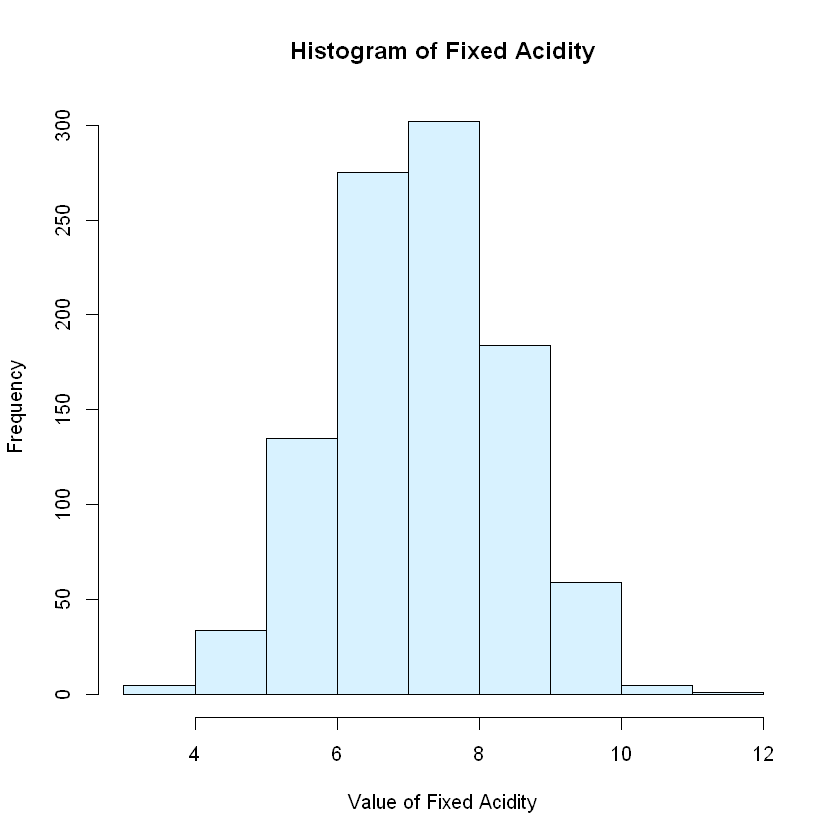

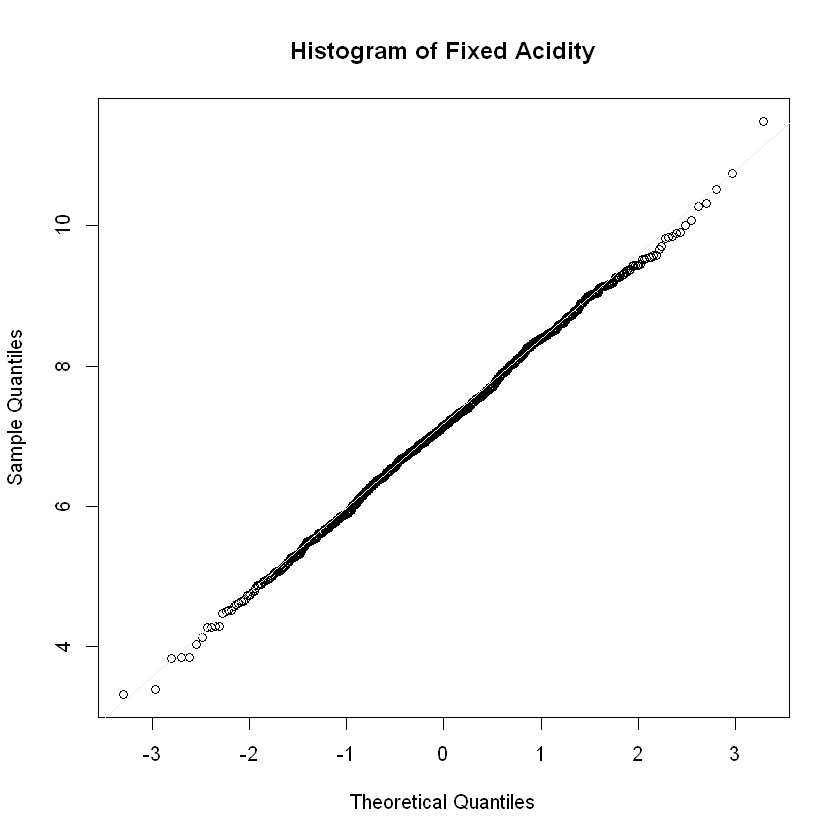

In [4]:
# Uji Kualitatif
fixed_acidity <- df$fixed.acidity

getHist(fixed_acidity, "Fixed Acidity", "#D8F2FF")
getQQPlot(fixed_acidity, "Fixed Acidity", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus dari data berada pada data yang memiliki nilai tengah. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `fixed.acidity` terdistribusi normal.

In [5]:
# Uji Kuantitatif

shapiro.test(df$fixed.acidity)


	Shapiro-Wilk normality test

data:  df$fixed.acidity
W = 0.99904, p-value = 0.8937


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `fixed.acidity` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.02879 dan nilai kurtosis yang mendekati 3 yaitu 2.9688.

#### 2. Kolom *volatile.acidity*

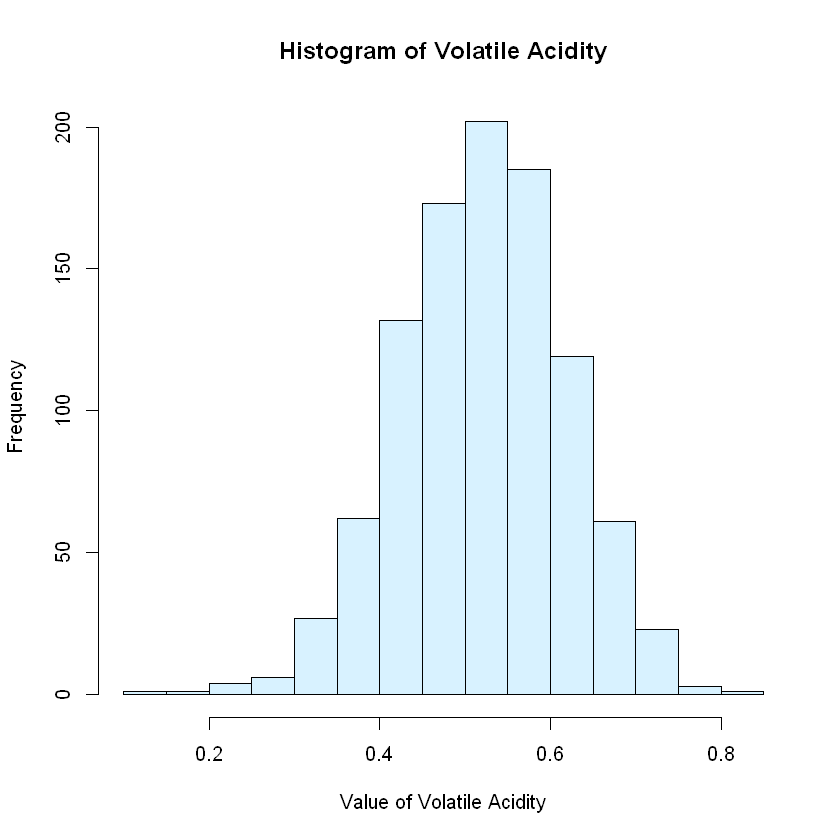

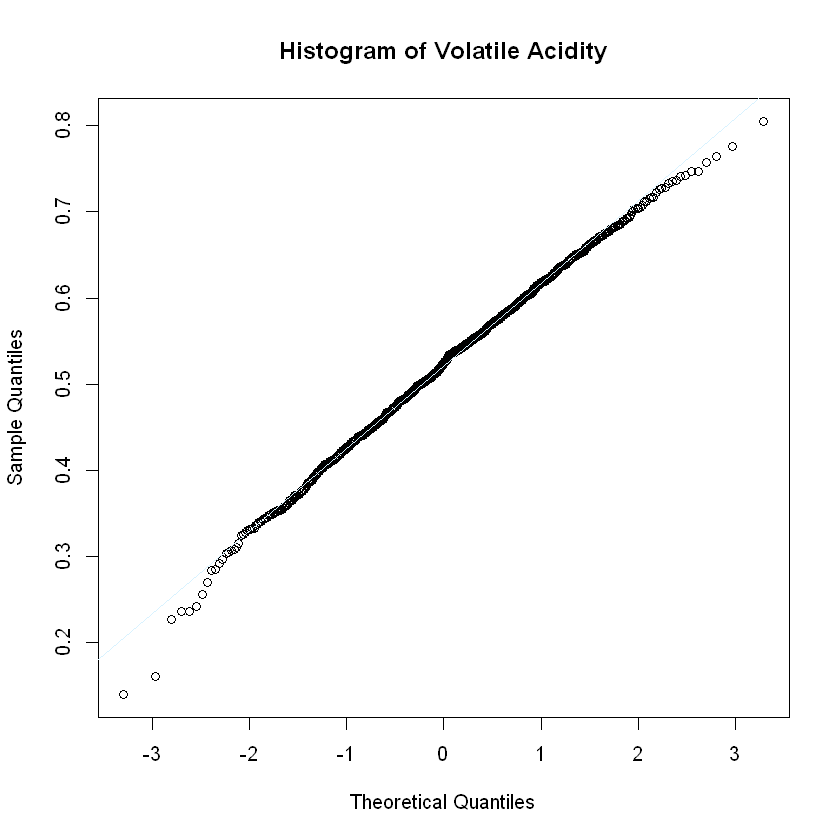

In [6]:
# Uji Kualitatif
volatile_acidity <- df$volatile.acidity

getHist(volatile_acidity, "Volatile Acidity", "#D8F2FF")
getQQPlot(volatile_acidity, "Volatile Acidity", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `volatile.acidity` terdistribusi normal.

In [7]:
# Uji Kuantitatif

shapiro.test(df$volatile.acidity)


	Shapiro-Wilk normality test

data:  df$volatile.acidity
W = 0.99703, p-value = 0.05991


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `volatile.acidity` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.1971 dan nilai kurtosis yang mendekati 3 yaitu 3.1487.

#### 3. Kolom *citric.acid*

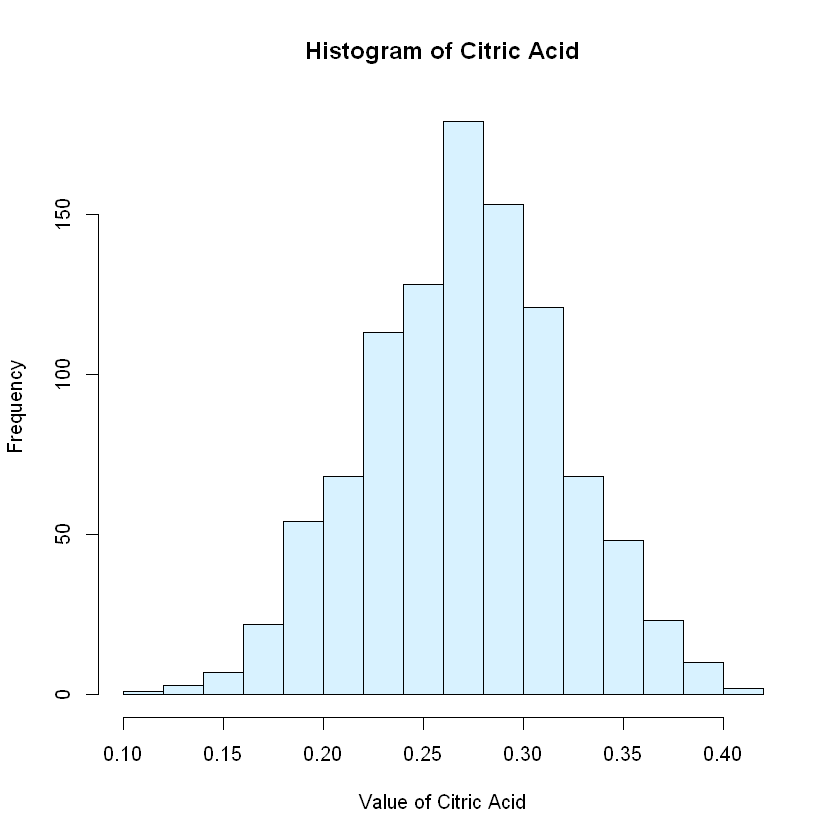

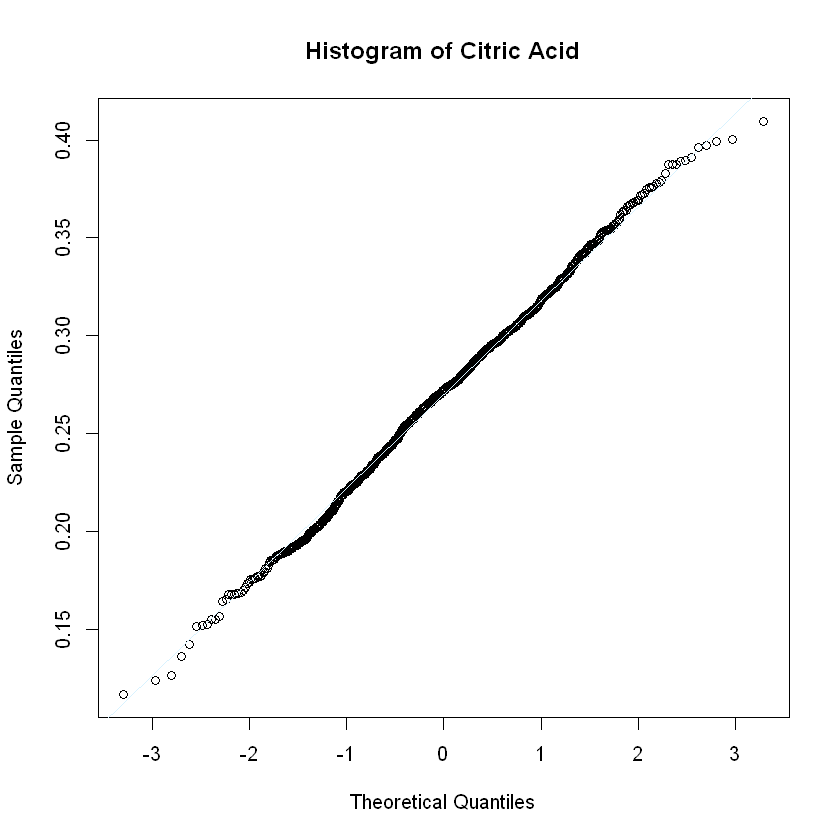

In [8]:
# Uji Kualitatif
citric_acid <- df$citric.acid

getHist(citric_acid, "Citric Acid", "#D8F2FF")
getQQPlot(citric_acid, "Citric Acid", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `citric.acid` terdistribusi normal.

In [9]:
# Uji Kuantitatif

shapiro.test(df$citric.acid)


	Shapiro-Wilk normality test

data:  df$citric.acid
W = 0.99796, p-value = 0.2649


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `citric.acid` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.0454 dan nilai kurtosis yang mendekati 3 yaitu 2.88407.

#### 4. Kolom *residual.sugar*

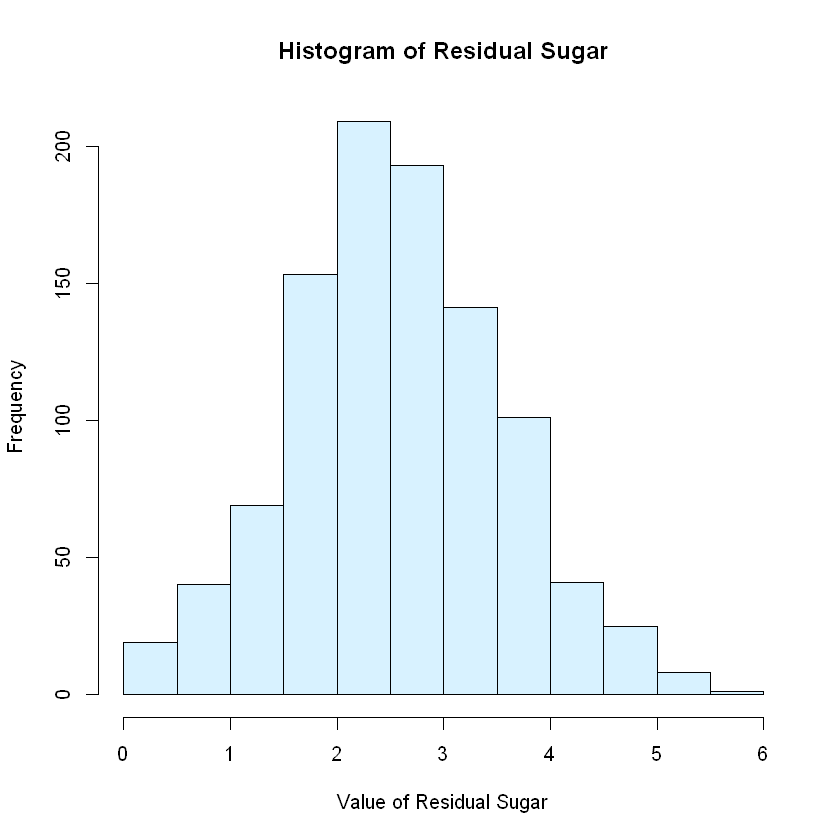

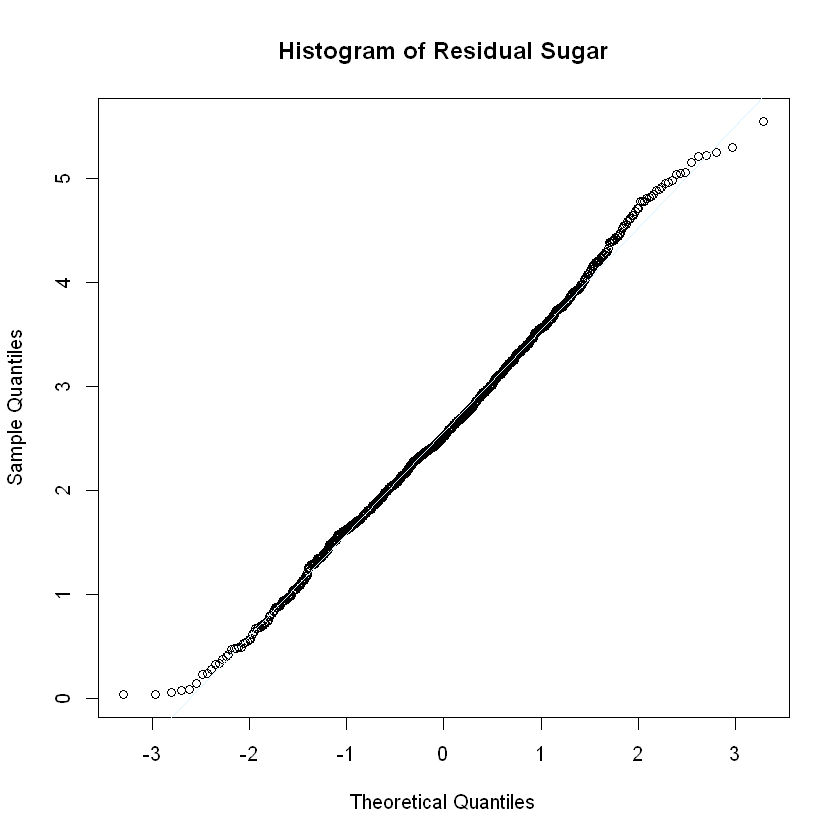

In [10]:
# Uji Kualitatif
residual_sugar <- df$residual.sugar

getHist(residual_sugar, "Residual Sugar", "#D8F2FF")
getQQPlot(residual_sugar, "Residual Sugar", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `residual.sugar` terdistribusi normal.

In [11]:
# Uji Kuantiatif

shapiro.test(df$residual.sugar)


	Shapiro-Wilk normality test

data:  df$residual.sugar
W = 0.99686, p-value = 0.045


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih kecil dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa berdasarkan tes tersebut, kolom `citric.acid` tidak terdistribusi normal. Namun, hal ini ini bertentangan dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga masih berkisar nilai 0 yaitu 0.1322 dan nilai kurtosis yang berkisar nilai 3 yaitu 2.94534.

#### 5. Kolom *chlorides*

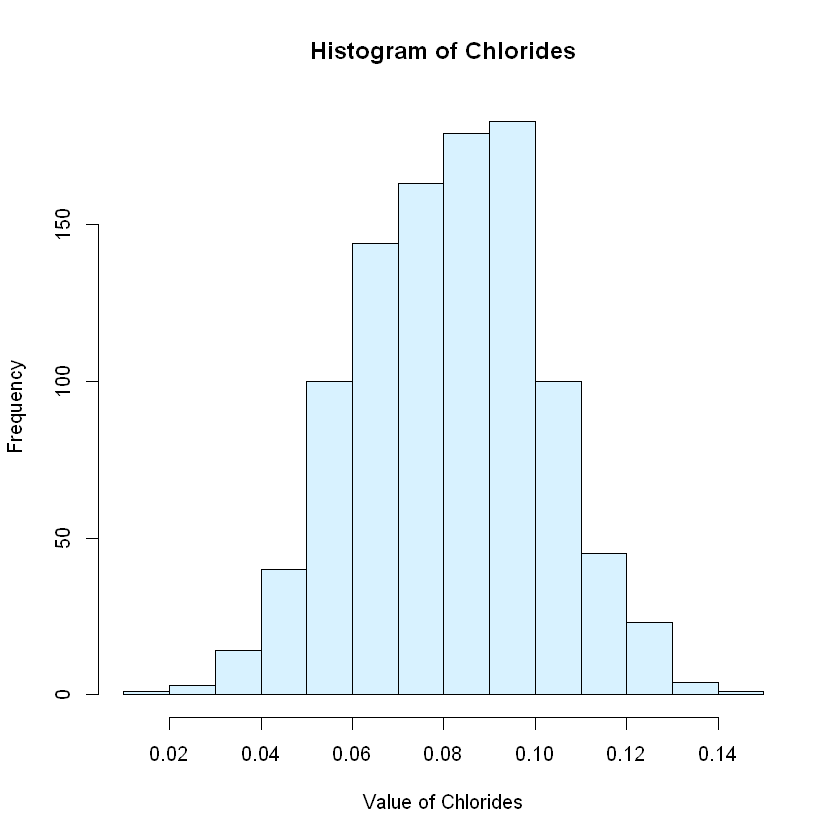

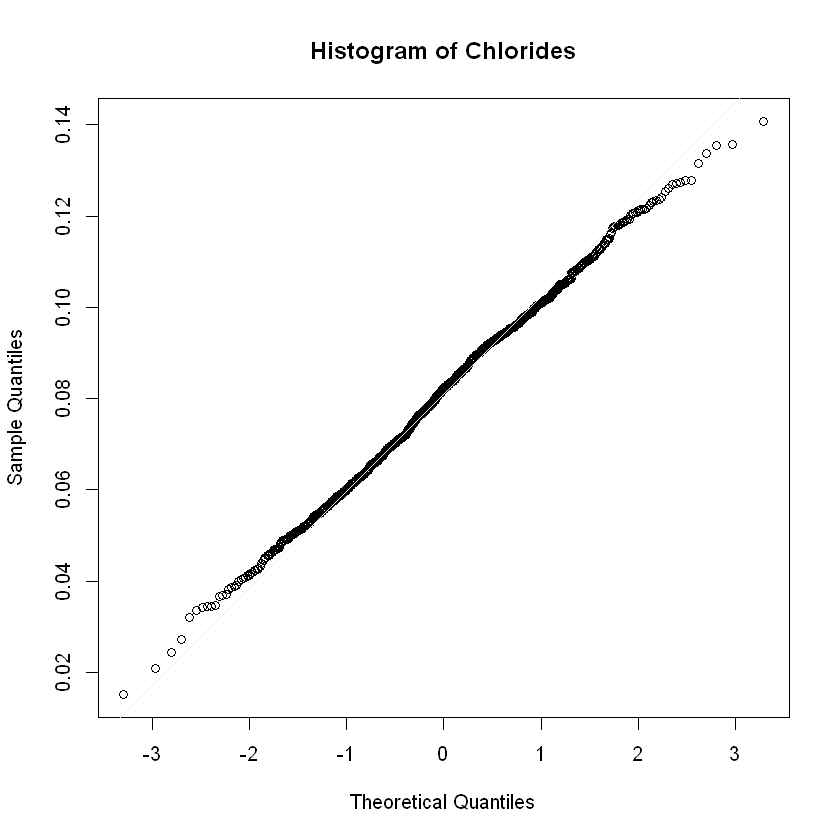

In [12]:
# Uji Kualitatif
chlorides <- df$chlorides

getHist(chlorides, "Chlorides", "#D8F2FF")
getQQPlot(chlorides, "Chlorides", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `chlorides` terdistribusi normal.

In [13]:
# Uji Kuantitatif

shapiro.test(df$chlorides)


	Shapiro-Wilk normality test

data:  df$chlorides
W = 0.99769, p-value = 0.1745


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `chlorides` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.05116 dan nilai kurtosis yang mendekati 3 yaitu 2.74323.

#### 6. Kolom *free.sulfur.dioxide*

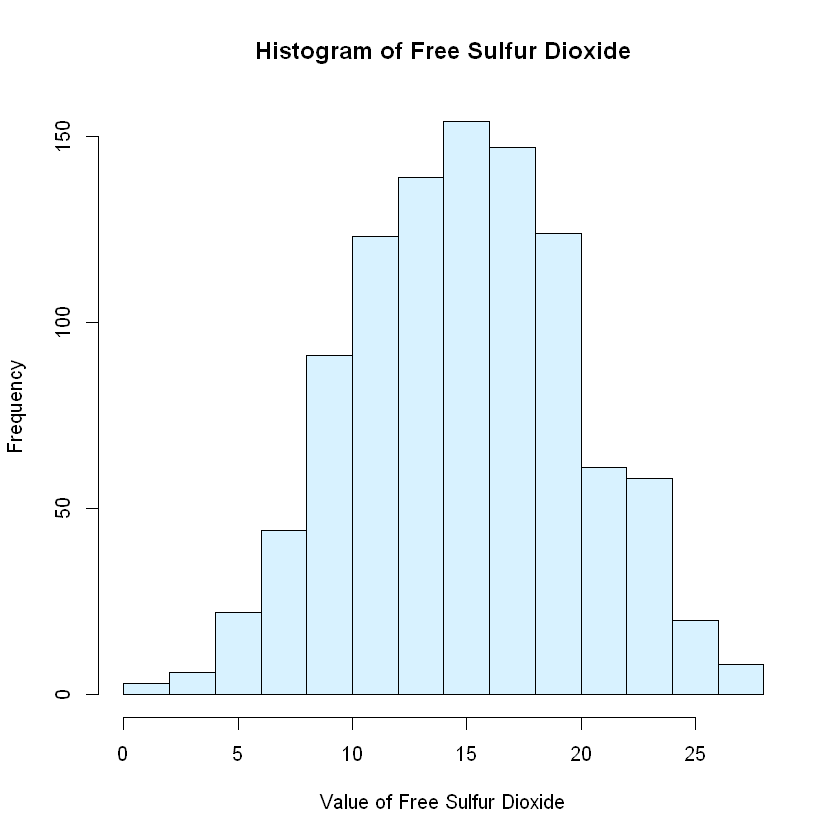

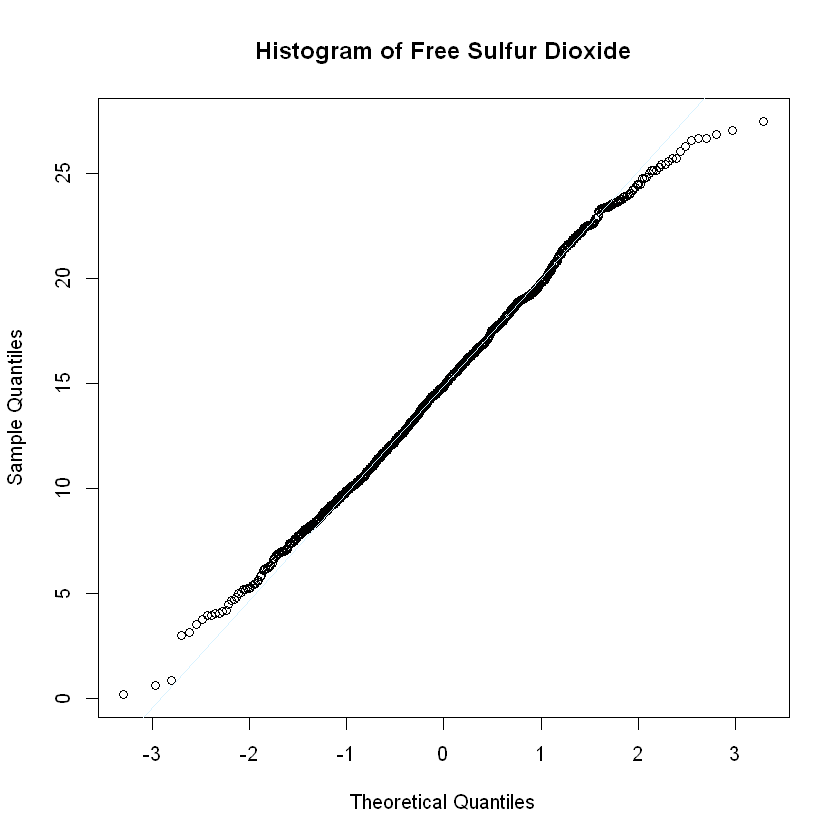

In [14]:
# Uji Kualitatif
free_sulfur_dioxide <- df$free.sulfur.dioxide

getHist(free_sulfur_dioxide, "Free Sulfur Dioxide", "#D8F2FF")
getQQPlot(free_sulfur_dioxide, "Free Sulfur Dioxide", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `free.sulfur.dioxide` terdistribusi normal.

In [15]:
# Uji Kuantitatif

shapiro.test(df$free.sulfur.dioxide)


	Shapiro-Wilk normality test

data:  df$free.sulfur.dioxide
W = 0.99682, p-value = 0.04247


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih kecil dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa berdasarkan tes tersebut, kolom `free.sulfur.dioxide` tidak terdistribusi normal. Namun, hal ini ini bertentangan dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga masih berkisar nilai 0 yaitu 0.00710 dan nilai kurtosis yang berkisar nilai 3 yaitu 2.6256.

#### 7. Kolom *total.sulfur.dioxide*

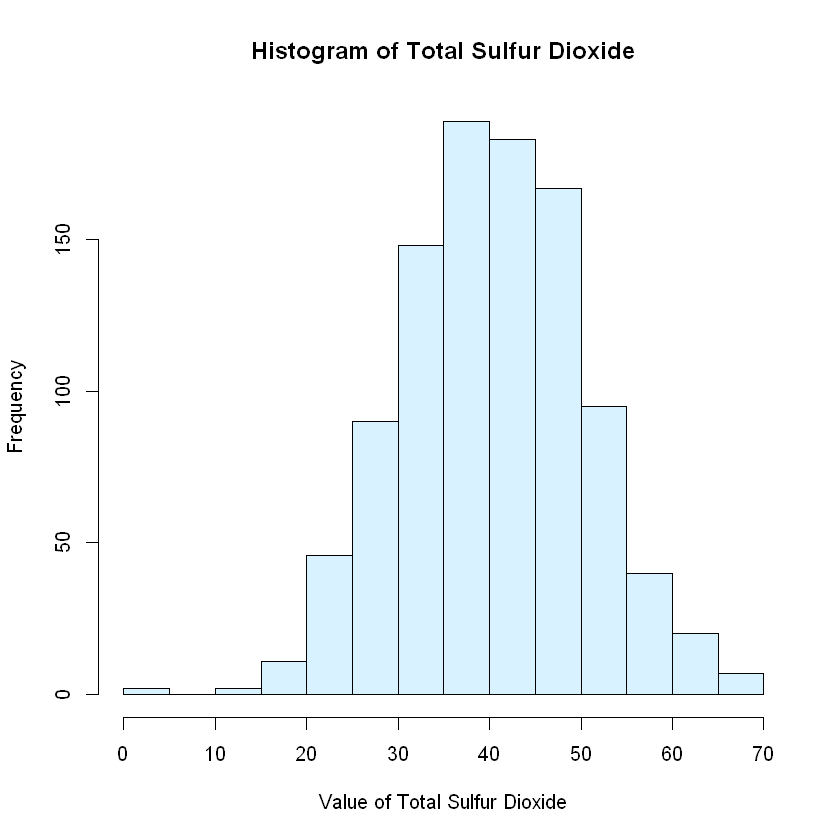

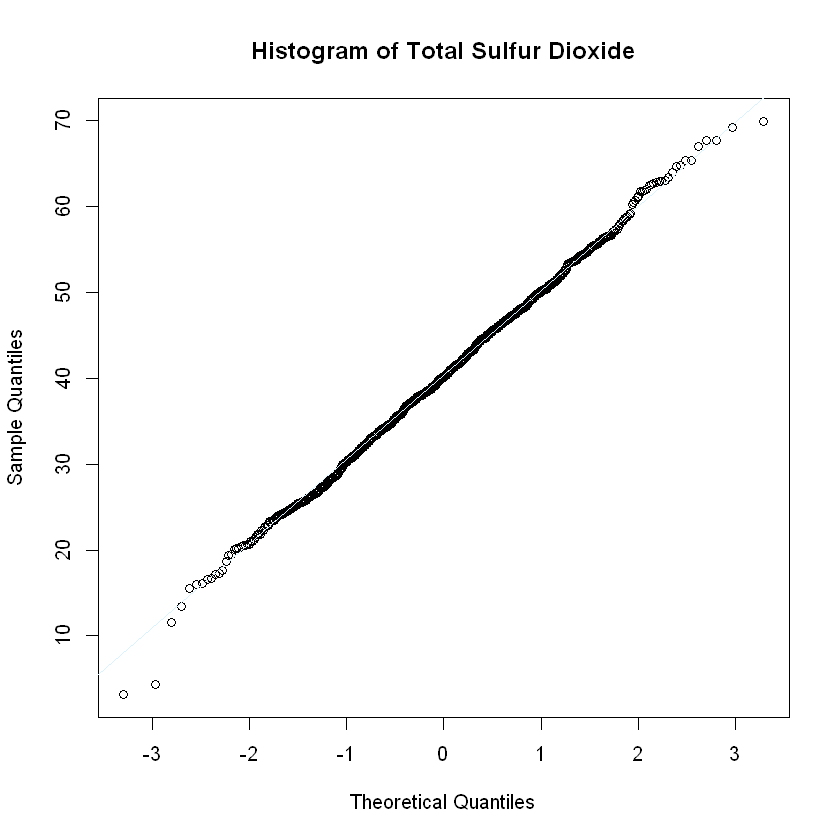

In [16]:
# Uji Kualitatif
total_sulfur_dioxide <- df$total.sulfur.dioxide

getHist(total_sulfur_dioxide, "Total Sulfur Dioxide", "#D8F2FF")
getQQPlot(total_sulfur_dioxide, "Total Sulfur Dioxide", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `total.sulfur.dioxide` terdistribusi normal.

In [17]:
# Uji Kuantitatif

shapiro.test(df$total.sulfur.dioxide)


	Shapiro-Wilk normality test

data:  df$total.sulfur.dioxide
W = 0.99847, p-value = 0.5367


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `total.sulfur.dioxide` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.02398 dan nilai kurtosis yang mendekati 3 yaitu 3.05152.

#### 8. Kolom *density*

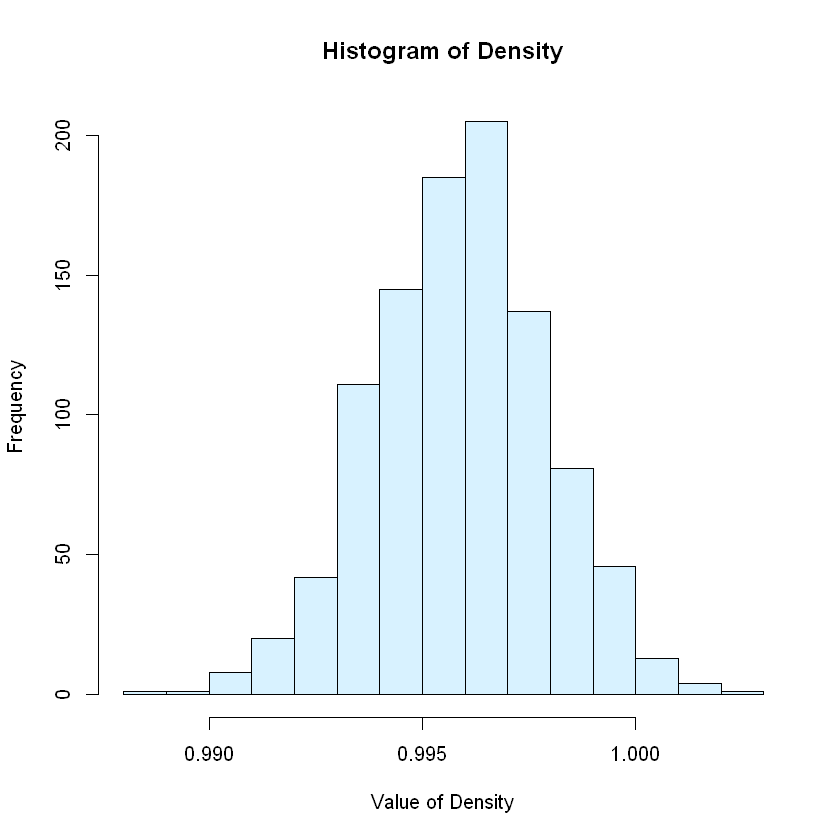

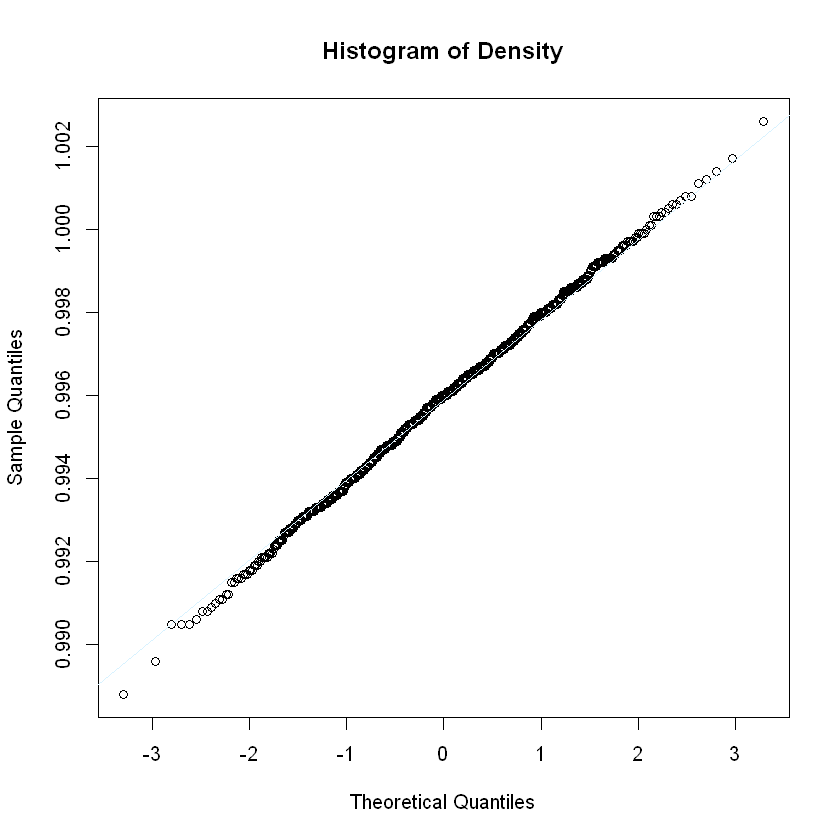

In [18]:
# Uji Kualitatif
density <- df$density

getHist(density, "Density", "#D8F2FF")
getQQPlot(density, "Density", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `density` terdistribusi normal.

In [19]:
# Uji Kuantitatif

shapiro.test(df$density)


	Shapiro-Wilk normality test

data:  df$density
W = 0.99896, p-value = 0.8533


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `density` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.07665 dan nilai kurtosis yang mendekati 3 yaitu 3.00427.

#### 9. Kolom *pH*

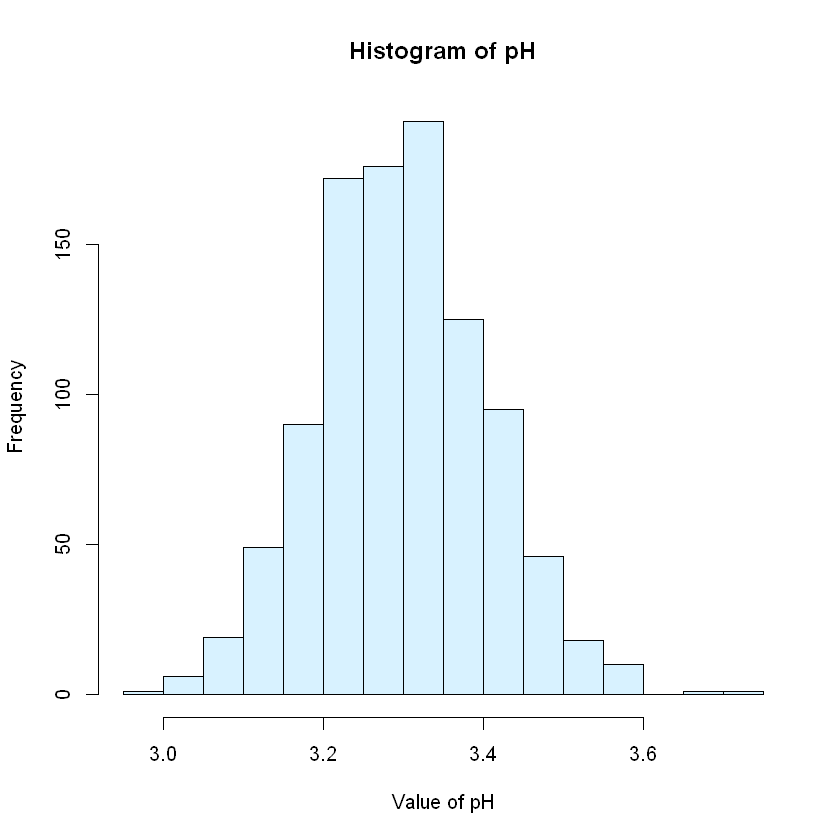

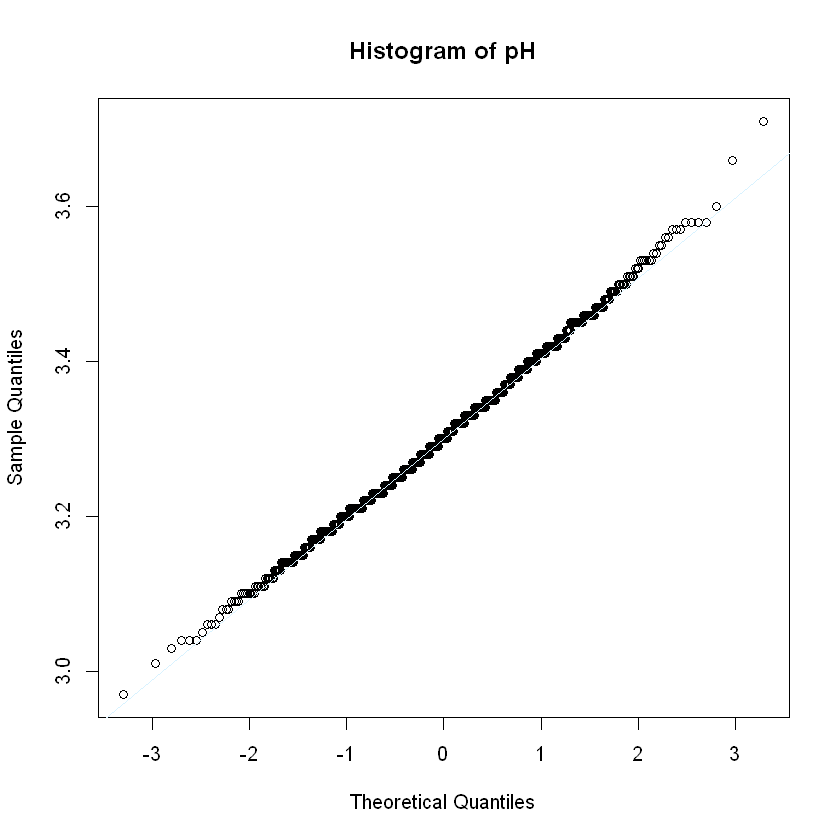

In [20]:
# Uji Kualitatif
pH <- df$pH

getHist(pH, "pH", "#D8F2FF")
getQQPlot(pH, "pH", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `pH` terdistribusi normal.

In [21]:
# Uji Kuantitatif

shapiro.test(df$pH)


	Shapiro-Wilk normality test

data:  df$pH
W = 0.99754, p-value = 0.1373


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `pH` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu 0.14722 dan nilai kurtosis yang mendekati 3 yaitu 3.0683.

#### 10. Kolom *sulphates*

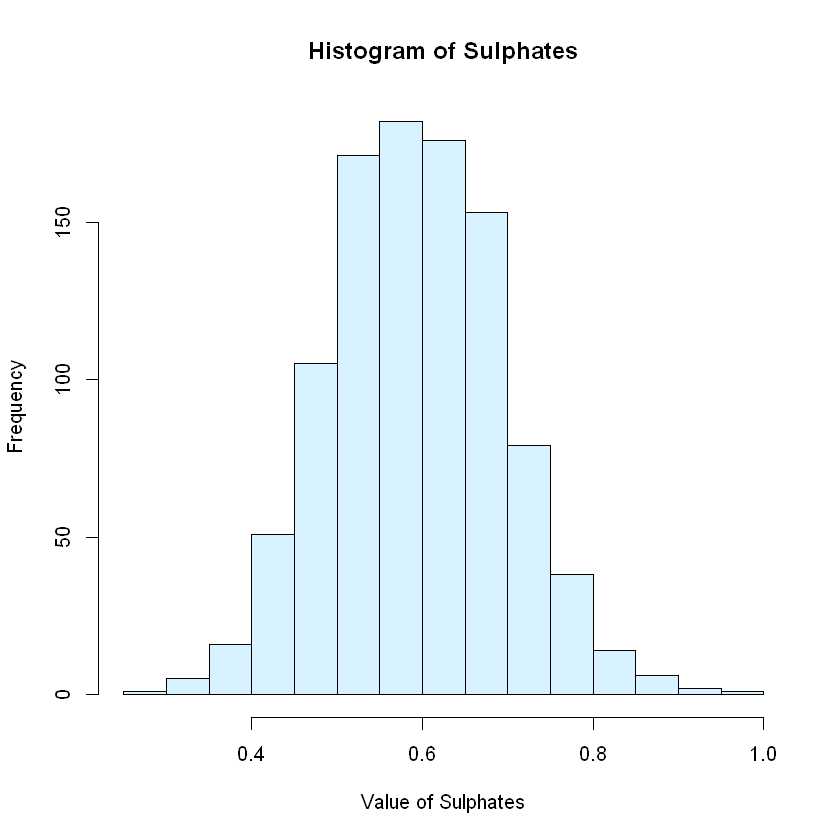

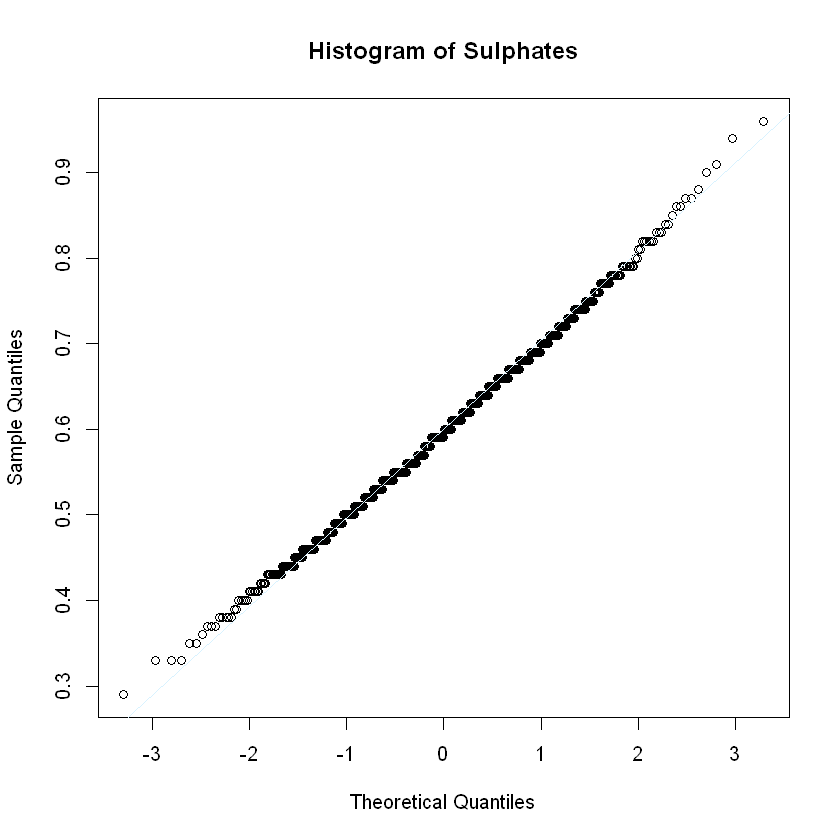

In [22]:
# Uji Kualitatif
sulphates <- df$sulphates

getHist(sulphates, "Sulphates", "#D8F2FF")
getQQPlot(sulphates, "Sulphates", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `sulphates` terdistribusi normal.

In [23]:
# Uji Kuantitatif
shapiro.test(df$sulphates)


	Shapiro-Wilk normality test

data:  df$sulphates
W = 0.99741, p-value = 0.1123


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `sulphates` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu 0.14875 dan nilai kurtosis yang mendekati 3 yaitu 3.052387.

#### 11. Kolom *alcohol*

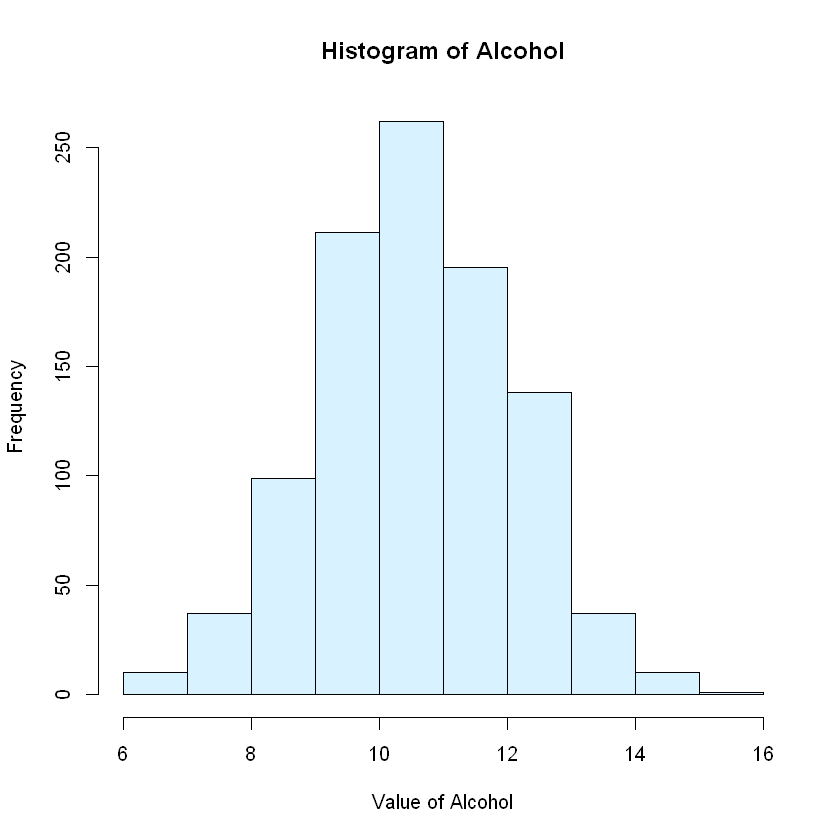

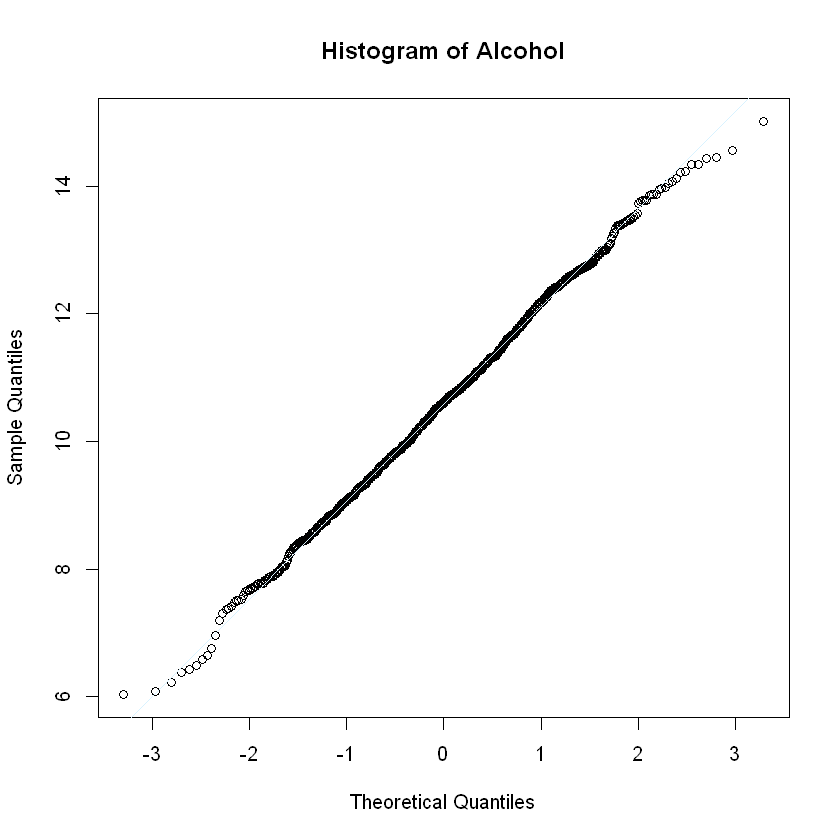

In [24]:
# Uji Kualitatif
alcohol <- df$alcohol

getHist(alcohol, "Alcohol", "#D8F2FF")
getQQPlot(alcohol, "Alcohol", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Tak hanya itu, didukung dengan grafik QQPlot, dapat dilihat bahwa data masih memenuhi garis lurus yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `alcohol` terdistribusi normal.

In [25]:
# Uji Kuantitatif
shapiro.test(df$alcohol)


	Shapiro-Wilk normality test

data:  df$alcohol
W = 0.99844, p-value = 0.5191


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `sulphates` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.01893 dan nilai kurtosis yang mendekati 3 yaitu 2.8572.

#### 12. Kolom *quality*

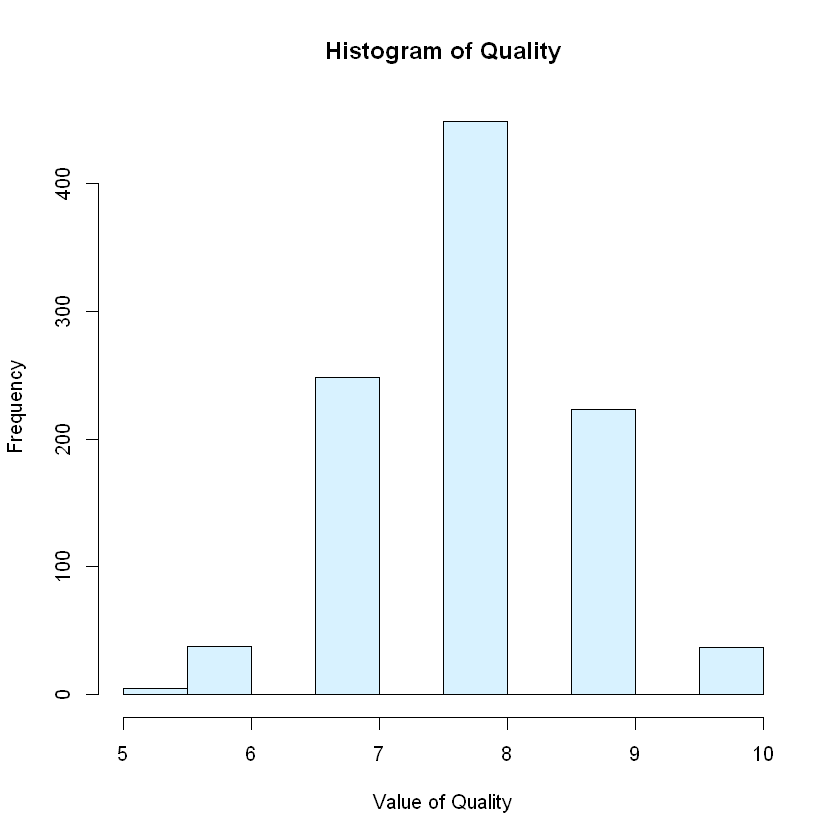

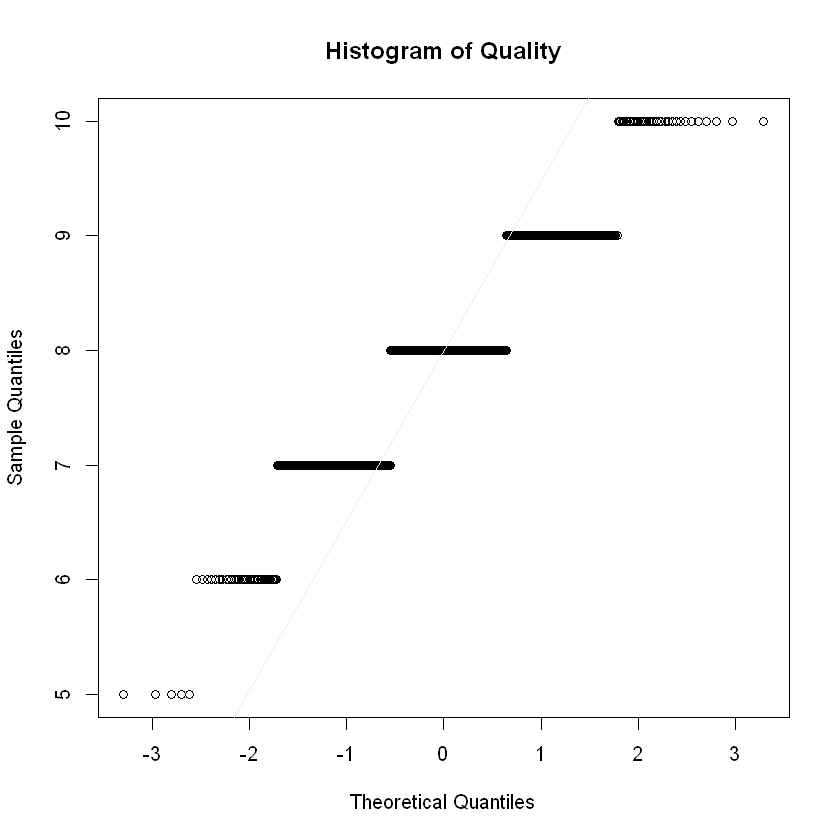

In [26]:
# Uji Kualitatif
quality <- df$quality

getHist(quality, "Quality", "#D8F2FF")
getQQPlot(quality, "Quality", "#D8F2FF")

Berdasarkan grafik histogram, dapat dilihat bahwa data memiliki bentuk yang terdistribusi normal. Modus pada data berada pada rentang yang masih tergolong berada di tengah-tengah data. Walau terlihat data yang tidak lengkap, mengingat data yang terdapat pada kolom ini bernilai bilangan bulat, histogram yang terbentuk masih menyerupai bentuk distribusi normal. Berbeda halnya dengan grafik QQPlot. Pada grafik ini, tidak begitu terlihat bahwa garis tetap mengikuti garis lurus pada QQPlot. Akan tetapi, secara garis besar data tetap memenuhi lintasan miring sesuai garis yang tertera. Dengan begitu, berdasarkan uji kualitatif data pada kolom `quality` terdistribusi normal.

In [27]:
# Uji Kuantitatif
shapiro.test(df$quality)


	Shapiro-Wilk normality test

data:  df$quality
W = 0.8955, p-value < 2.2e-16


Berdasarkan Saphiro Wilk test, didapatkan nilai p-value yang lebih besar dibandingkan 0.05. Maka dari itu, dapat diasumikan bahwa kolom `quality` terdistribusi normal. Hal ini juga didukung dengan nilai mean dan median yang hampir serupa, serta nilai modus yang berada pada suatu rentang yang sama pada histogram. Terakhir, nilai skewness juga mendekati 0 yaitu -0.08878 dan nilai kurtosis yang mendekati 3 yaitu 3.09555.